# Projeto Média Móvel - Dados COVID SP

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

***
## Análise e Tratamento Inicial

O banco de dados está disponível no site do [Seade](https://www.seade.gov.br/coronavirus/#), um grupo que trabalha com estudo estatístico para o estado de SP. A descrição de todas as variáveis está no site.

In [20]:
dados = pd.read_csv('dados_covid_sp.csv', sep=';')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,00000000000000e+00","0,000000000000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [21]:
dados.shape

(323000, 26)

São 36 variáveis (colunas) e 323 mil registros (linhas).

É possível verificar que há duas variáveis: **`casos_mm7d`** e **`obitos_mm7d`**, ambas são variáveis de media móveis, com o período de 7 dias, vamos trabalhar utilizando as duas médias móveis (MMS) com a respectiva série.

Vamos verificar o tipo das variáveis:

In [22]:
dados.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d        object
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d       object
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

A variável **`datahora`** será o nosso tempo, que não representa hora e sim mês e ano. Ela não está em formato de data pelo Python. A variável **`casos_novos`** está do tipo inteiro, ou seja, o formato que queremos. As duas médias móveis que iremos trabalhar (**`casos_mm7d`** e **`obitos_mm7d`**) está em formato de string, teremos que mudar o tipo de ambas as variáveis.

Outro problema que nós percebemos, uma vez que o python reconheceu a média móvel como uma string, é o uso da vírgula para separar as casas decimais. No Python, é utilizado o ponto (.) para fazer essa separação, que no caso seria o padrão americano.

In [23]:
dados['casos_mm7d'] = dados['casos_mm7d'].str.replace(',', '.')
dados['casos_mm7d'] = pd.to_numeric(dados['casos_mm7d']) # Transformar para uma variável numérica

dados['obitos_mm7d'] = dados['obitos_mm7d'].str.replace(',', '.')
dados['obitos_mm7d'] = pd.to_numeric(dados['obitos_mm7d'])

In [26]:
dados.dtypes

nome_munic        object
codigo_ibge        int64
dia                int64
mes                int64
datahora          object
casos              int64
casos_novos        int64
casos_pc          object
casos_mm7d       float64
obitos             int64
obitos_novos       int64
obitos_pc         object
obitos_mm7d      float64
letalidade        object
nome_ra           object
cod_ra             int64
nome_drs          object
cod_drs            int64
pop                int64
pop_60             int64
area               int64
map_leg           object
map_leg_s        float64
latitude          object
longitude         object
semana_epidem      int64
dtype: object

Conseguimos com sucesso transformar o tipo de variável categórica para numérica de ambas médias móveis. <br>

Vamos verificar se há algum valor faltante nos dados. 

In [30]:
((dados.isnull().sum())/dados.shape[0])*100

nome_munic       0.000000
codigo_ibge      0.000000
dia              0.000000
mes              0.000000
datahora         0.000000
casos            0.000000
casos_novos      0.000000
casos_pc         0.000000
casos_mm7d       0.000000
obitos           0.000000
obitos_novos     0.000000
obitos_pc        0.000000
obitos_mm7d      0.000000
letalidade       0.000000
nome_ra          0.154799
cod_ra           0.000000
nome_drs         0.154799
cod_drs          0.000000
pop              0.000000
pop_60           0.000000
area             0.000000
map_leg          0.154799
map_leg_s        0.154799
latitude         0.000000
longitude        0.000000
semana_epidem    0.000000
dtype: float64

Há apenas 0,15% dos dados faltando nas seguintes variáveis: `nome_ra`, `nome_drs`, `map_leg`, `map_leg_s`. Por se tratar de quantidades insignificantes e de variáveis que não iremos utilizar, vamos apenas excluir os ausentes.

In [35]:
dados_2 = dados.dropna()
((dados_2.isnull().sum())/dados_2.shape[0])*100

nome_munic       0.0
codigo_ibge      0.0
dia              0.0
mes              0.0
datahora         0.0
casos            0.0
casos_novos      0.0
casos_pc         0.0
casos_mm7d       0.0
obitos           0.0
obitos_novos     0.0
obitos_pc        0.0
obitos_mm7d      0.0
letalidade       0.0
nome_ra          0.0
cod_ra           0.0
nome_drs         0.0
cod_drs          0.0
pop              0.0
pop_60           0.0
area             0.0
map_leg          0.0
map_leg_s        0.0
latitude         0.0
longitude        0.0
semana_epidem    0.0
dtype: float64

Como os dados do **Seade** trabalha com o estado de SP, vamos restringir o nosso estudo de média móvel apenas para a cidade e SP.

In [37]:
dados_sp = dados_2[dados_2['nome_munic'] == 'São Paulo']
dados_sp.head(10)

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,42484114962012e-03",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9
3787,São Paulo,3550308,1,3,2020-03-01,2,0,"1,68496822992402e-02",0.000000,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
4432,São Paulo,3550308,2,3,2020-03-02,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5077,São Paulo,3550308,3,3,2020-03-03,2,0,"1,68496822992402e-02",0.142857,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
5722,São Paulo,3550308,4,3,2020-03-04,3,1,"2,52745234488604e-02",0.285714,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10
6367,São Paulo,3550308,5,3,2020-03-05,6,3,"5,05490468977207e-02",0.714286,0,...,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",10


## Média Móvel Casos Novos

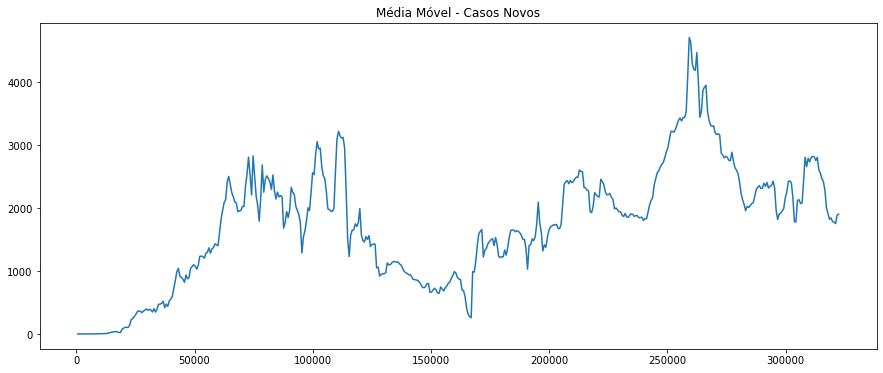

In [38]:
plt.plot(dados_sp['casos_mm7d'])
plt.title('Média Móvel - Casos Novos') # Título do gráfico
plt.grid(False) # Sem a régua
plt.show() 

Essa é a média móvel oferecida pelo Seade, seria interessante criarmos a nossa prória média móvel e fazer uma comparação. <br>

Vamos criar a série referente aos casos novos (`casos_novos`):

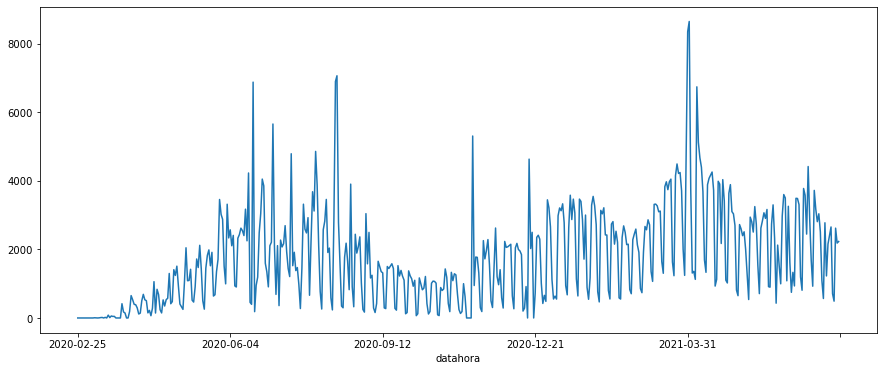

In [41]:
serie = pd.Series(dados_sp['casos_novos'].values, index = dados_sp['datahora'])
serie.plot();

Criando a média móvel simples, com o mesmo período de 7 dias: 

In [44]:
media_casos = serie.rolling(window=7)
media_casos = media_casos.mean()

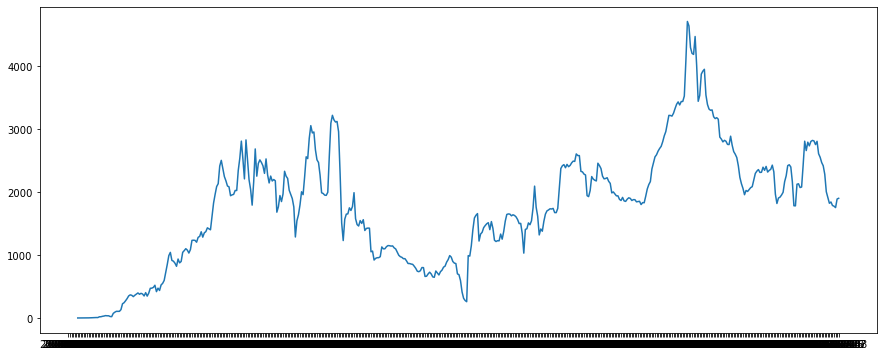

In [45]:
plt.plot(media_casos);

Está igual ao do Senade. Vamos agora plotar a série e a média móvel no mesmo gráfico.

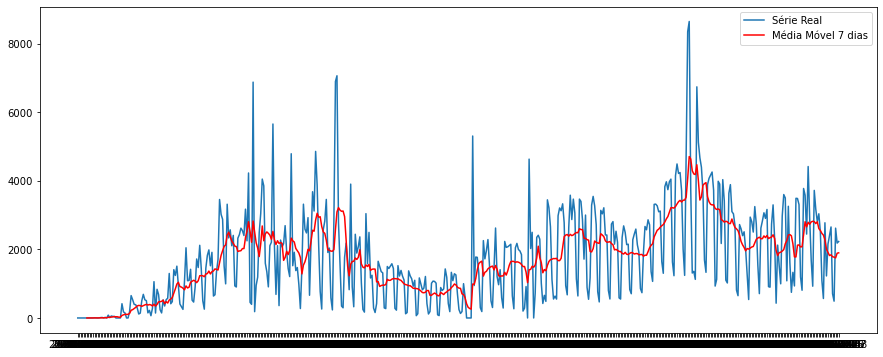

In [47]:
plt.plot(serie, label='Série Real')
plt.plot(media_casos, color='red', label='Média Móvel 7 dias')
plt.legend(loc='best')
plt.show()

Por ser uma média móvel simples, o seu cálculo perde 7 dias no começo da série, podemos remover esse problema criando a média móvel centralizada. A média móvel serve como uma série que suaviza a série original, por se tratar de uma média.

## Média Móvel Óbitos Novos

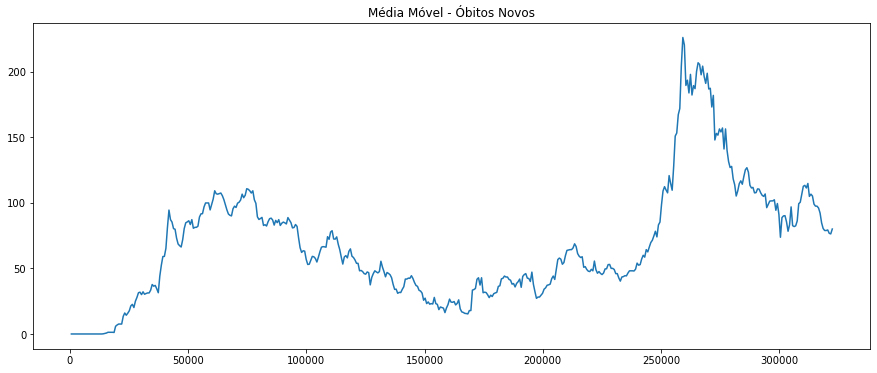

In [48]:
plt.plot(dados_sp['obitos_mm7d'])
plt.title('Média Móvel - Óbitos Novos')
plt.grid(False)
plt.show()

Vamos, novamente, recriar essa média móvel, uma vez que ela já veio pronta no banco de dados do Seade.

In [49]:
serie = pd.Series(dados_sp['obitos_novos'].values, index = dados_sp['datahora'])
serie

datahora
2020-02-25      0
2020-02-26      0
2020-02-27      0
2020-02-28      0
2020-02-29      0
             ... 
2021-07-04      8
2021-07-05     14
2021-07-06    136
2021-07-07     88
2021-07-08    119
Length: 500, dtype: int64

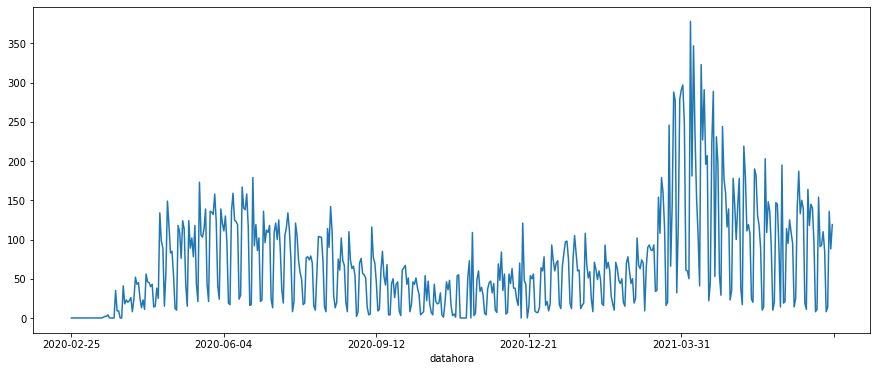

In [51]:
serie.plot();

In [52]:
media_obitos = serie.rolling(window=7)
media_obitos = media_obitos.mean()

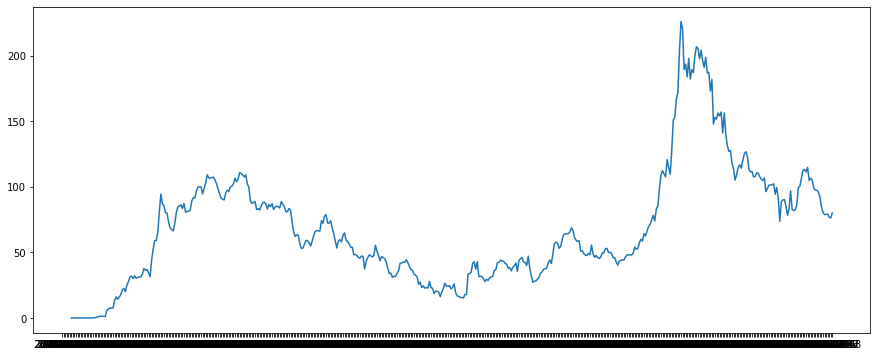

In [53]:
plt.plot(media_obitos);

Novamente, mesma média móvel feita pela organização. <br>

Vamos fazer uma comparação:

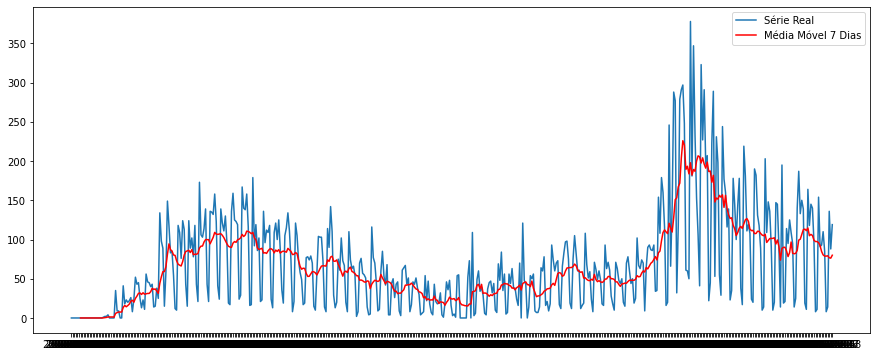

In [54]:
plt.plot(serie, label='Série Real')
plt.plot(media_obitos, color='red', label='Média Móvel 7 Dias')
plt.legend(loc='best')
plt.show()

In [55]:
dados.shape

(323000, 26)